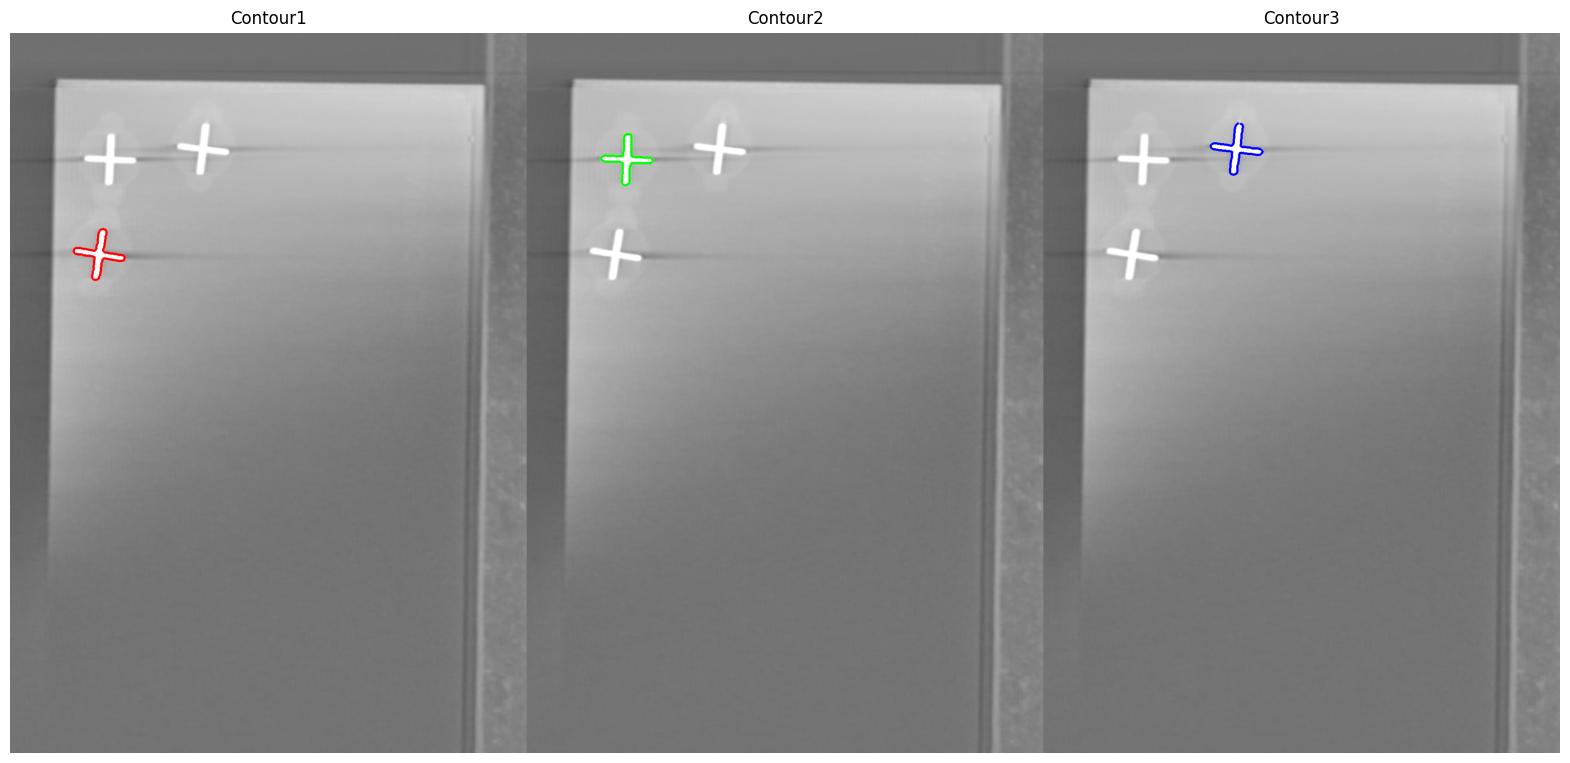

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드
image = cv2.imread('ex3.png', cv2.IMREAD_COLOR)
ori_mage_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# gray scale 변환
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 100, 110)

contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

class1_contours = np.copy(ori_mage_rgb)
class2_contours = np.copy(ori_mage_rgb)
class3_contours = np.copy(ori_mage_rgb)

for i, contour in enumerate(contours):
    # 현재 윤곽선의 계층 정보
    current_hierarchy = hierarchy[0][i]

    # 첫 번째 계층의 윤곽선인 경우
    if current_hierarchy[0] == 2:
        cv2.drawContours(class1_contours, contour, -1, (255, 0, 0), 3)
    # 두 번째 계층의 윤곽선인 경우
    elif current_hierarchy[0] == 5 or current_hierarchy[0] == 3:
        cv2.drawContours(class2_contours, contour, -1, (0, 255, 0), 3)
    # 세 번째 계층의 윤곽선인 경우
    elif current_hierarchy[0] == 7 or current_hierarchy[0] == 6 or current_hierarchy[0] == 4:
        cv2.drawContours(class3_contours, contour, -1, (0, 0, 255), 3)

concatenated_image = np.concatenate((class1_contours, class2_contours, class3_contours), axis=1)
fig, ax = plt.subplots(figsize=(20, 15))

plt.imshow(concatenated_image, cmap='gray')
plt.axis('off')
ax.text(0.5 * class1_contours.shape[1], -20, 'Contour1', fontsize=12, color='black', ha='center')
ax.text(class1_contours.shape[1] + 0.5 * class2_contours.shape[1], -20, 'Contour2', fontsize=12, color='black', ha='center')
ax.text(class1_contours.shape[1] + class2_contours.shape[1] + 0.5 * class3_contours.shape[1], -20, 'Contour3', fontsize=12, color='black', ha='center')
plt.show()

def LJH_Contour(img, grp):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    if grp == 1:
        edges = cv2.Canny(gray, 255, 300)
        lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=5, minLineLength=3, maxLineGap=10)
        if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = line[0]
                cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    elif grp == 2:
        edges = cv2.Canny(gray, 300, 400)
        lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=5, minLineLength=3, maxLineGap=10)
        if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = line[0]
                cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    elif grp == 3:
        edges = cv2.Canny(gray, 300, 400)
        lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=5, minLineLength=3, maxLineGap=10)
        if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = line[0]
                cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    marker_center_x1 = np.mean([point[0][0] for point in lines])
    marker_center_y1 = np.mean([point[0][1] for point in lines])
    marker_center_x2 = np.mean([point[0][2] for point in lines])
    marker_center_y2 = np.mean([point[0][3] for point in lines])

    marker_center = (marker_center_x1 + marker_center_x2)/2, (marker_center_y1 + marker_center_y2)/2

    cv2.circle(image, (int(marker_center[0]), int(marker_center[1])), 5, (0, 255, 0), -1)

    if grp == 3:
        moment_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        fig = plt.figure(figsize=(15, 10))
        plt.imshow(moment_image_rgb, cmap='gray')
        plt.axis('off')
        plt.show()

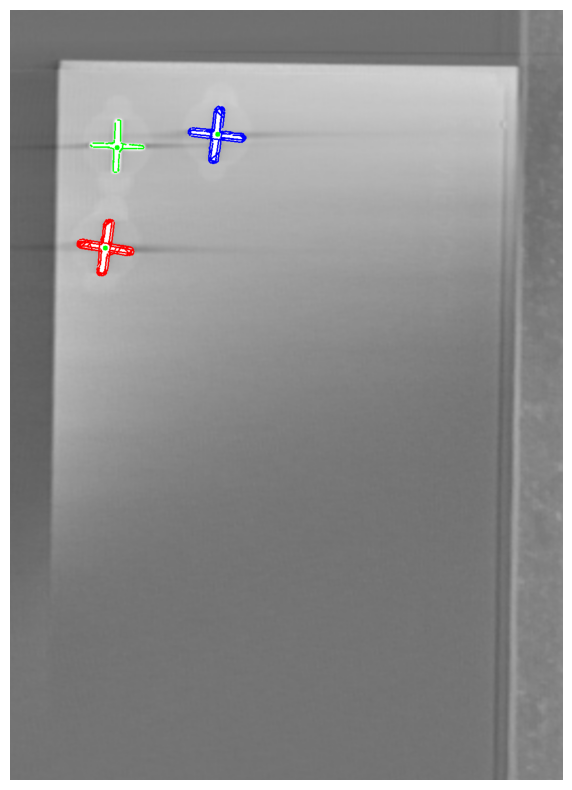

In [55]:
LJH_Contour(class1_contours, 1)
LJH_Contour(class2_contours, 2)
LJH_Contour(class3_contours, 3)